data from https://www.kaggle.com/mattiuzc/commodity-futures-price-history


# 데이터 압축 풀기

In [1]:
!wget https://github.com/dhrim/deep_learning_data/raw/master/commodity.zip

--2022-01-19 06:41:16--  https://github.com/dhrim/deep_learning_data/raw/master/commodity.zip
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/deep_learning_data/master/commodity.zip [following]
--2022-01-19 06:41:16--  https://raw.githubusercontent.com/dhrim/deep_learning_data/master/commodity.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1835488 (1.8M) [application/zip]
Saving to: ‘commodity.zip’

commodity.zip       100%[===================>]   1.75M  --.-KB/s    in 0.07s   

2022-01-19 06:41:16 (24.5 MB/s) - ‘commodity.zip’ saved [1835488/1835488]



In [2]:
!rm -rf commodity
!unzip commodity.zip

Archive:  commodity.zip
   creating: commodity/
  inflating: commodity/Natural Gas.csv  
  inflating: commodity/Soybean.csv   
  inflating: commodity/Gold.csv      
  inflating: commodity/Platinum.csv  
  inflating: commodity/Heating Oil.csv  
  inflating: commodity/Palladium.csv  
  inflating: commodity/Silver.csv    
  inflating: commodity/Lumber.csv    
  inflating: commodity/Lean Hogs.csv  
  inflating: commodity/Soybean Meal.csv  
  inflating: commodity/Copper.csv    
  inflating: commodity/Live Cattle.csv  
  inflating: commodity/Soybean Oil.csv  
  inflating: commodity/Brent Crude Oil.csv  
  inflating: commodity/Cotton.csv    
  inflating: commodity/RBOB Gasoline.csv  
  inflating: commodity/Oat.csv       
  inflating: commodity/Coffee.csv    
  inflating: commodity/Wheat.csv     
  inflating: commodity/Sugar.csv     
  inflating: commodity/Corn.csv      
  inflating: commodity/Crude Oil.csv  
  inflating: commodity/Cocoa.csv     
  inflating: commodity/Feeder Cattle.csv  


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 파라매터 설정

In [4]:
SEQUENCE_LENGTH = 10
OFFSET = 1
BATCH_SIZE = 32

# 데이터 로딩

In [5]:
df = pd.read_csv("commodity/Gold.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0.0
1,2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0.0
2,2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0.0
3,2000-09-04,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988,2.0


In [ ]:
df = pd.read_csv("commodity/Silver.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-08-30,4.950,4.950,4.895,4.930,4.930,2319.0
1,2000-08-31,4.920,5.045,4.920,5.003,5.003,1612.0
2,2000-09-01,5.035,5.035,4.985,5.004,5.004,1375.0
3,2000-09-04,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-09-05,4.990,5.005,4.975,4.998,4.998,856.0


In [6]:
print(len(df))

5291


# 결측치 처리

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5291 entries, 0 to 5290
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5291 non-null   object 
 1   Open       5179 non-null   float64
 2   High       5179 non-null   float64
 3   Low        5179 non-null   float64
 4   Close      5179 non-null   float64
 5   Adj Close  5179 non-null   float64
 6   Volume     5179 non-null   float64
dtypes: float64(6), object(1)
memory usage: 289.5+ KB


In [8]:
df.isnull().sum()

Date           0
Open         112
High         112
Low          112
Close        112
Adj Close    112
Volume       112
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5179 entries, 0 to 5290
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5179 non-null   object 
 1   Open       5179 non-null   float64
 2   High       5179 non-null   float64
 3   Low        5179 non-null   float64
 4   Close      5179 non-null   float64
 5   Adj Close  5179 non-null   float64
 6   Volume     5179 non-null   float64
dtypes: float64(6), object(1)
memory usage: 323.7+ KB


# 정렬 순서 확인

In [12]:
df.sort_values(by=["Date"])

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0.0
1,2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0.0
2,2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0.0
4,2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988,2.0
5,2000-09-06,274.200012,274.200012,274.200012,274.200012,274.200012,0.0
...,...,...,...,...,...,...,...
5286,2021-06-03,1908.800049,1908.800049,1865.000000,1871.199951,1871.199951,1021.0
5287,2021-06-04,1869.300049,1895.500000,1854.000000,1889.800049,1889.800049,367.0
5288,2021-06-07,1890.500000,1899.699951,1883.199951,1896.800049,1896.800049,87.0
5289,2021-06-08,1896.500000,1902.900024,1890.000000,1892.199951,1892.199951,930.0


In [13]:
sorted_index = df.sort_values(by=["Date"]).index

In [14]:
print(sorted_index)
print(sorted_index - df.index)
print(sum(sorted_index - df.index))

Int64Index([   0,    1,    2,    4,    5,    6,    7,    8,    9,   10,
            ...
            5281, 5282, 5283, 5284, 5285, 5286, 5287, 5288, 5289, 5290],
           dtype='int64', length=5179)
Int64Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            ...
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           dtype='int64', length=5179)
0


In [15]:
print(df['Close'] - df['Adj Close'])
print(sum(df['Close'] - df['Adj Close']))

0       0.0
1       0.0
2       0.0
4       0.0
5       0.0
       ... 
5286    0.0
5287    0.0
5288    0.0
5289    0.0
5290    0.0
Length: 5179, dtype: float64
0.0


In [16]:
df.drop(columns=["Date", "Adj Close"], inplace=True)

Open


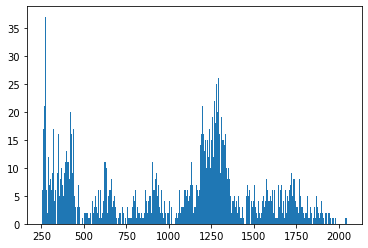

High


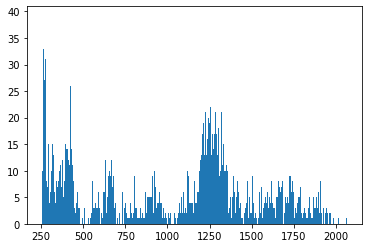

Low


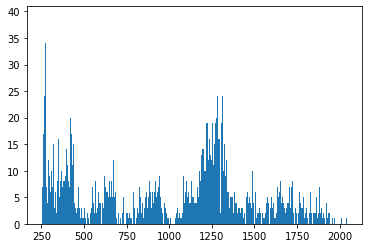

Close


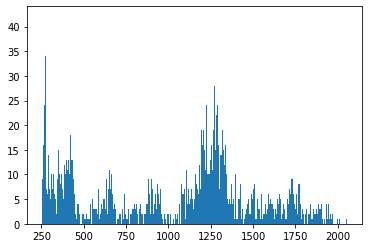

Volume


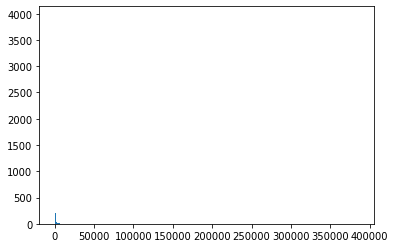

In [17]:
for i in range(len(df.columns)):
    print(df.columns[i])
    plt.hist(df.iloc[:,i], bins=1000)
    plt.show()

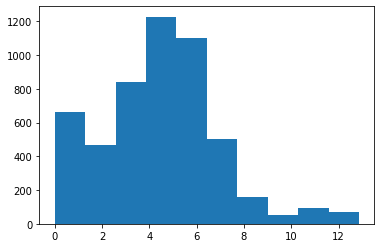

In [36]:
df['log_Volume']=np.log(df.Volume+1)
plt.hist(df.log_Volume)
plt.show()

In [37]:
df.drop(columns=["Volume"], inplace=True)

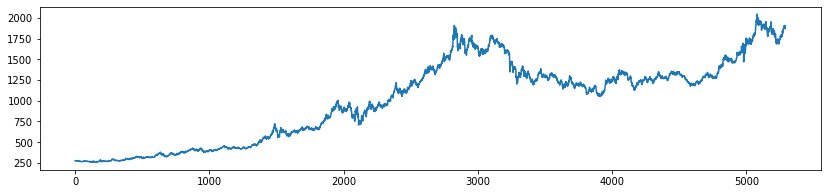

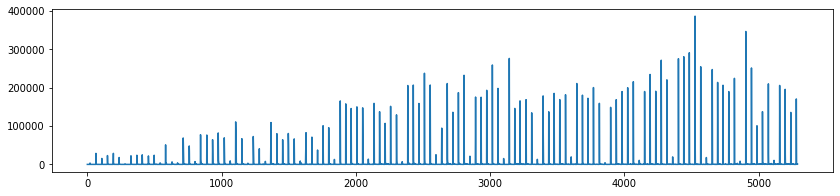

In [18]:
plt.figure(figsize=(14,3))
plt.plot(df.iloc[:,0])
plt.show()

plt.figure(figsize=(14,3))
plt.plot(df.iloc[:,4])
plt.show()


In [19]:
raw_data = df.to_numpy()
print(raw_data.shape)

(5179, 5)


In [20]:
print(raw_data[:5])

[[273.899994 273.899994 273.899994 273.899994   0.      ]
 [274.799988 278.299988 274.799988 278.299988   0.      ]
 [277.       277.       277.       277.         0.      ]
 [275.799988 275.799988 275.799988 275.799988   2.      ]
 [274.200012 274.200012 274.200012 274.200012   0.      ]]


# normalize

In [21]:
maxs = raw_data.max(axis=0)
print(maxs)
mins = raw_data.min(axis=0)
print(mins)

[  2045.5   2063.    2040.    2051.5 386334. ]
[255.       256.100006 255.       255.100006   0.      ]


In [22]:
normalized = (raw_data - mins) / (maxs - mins)
print(normalized[:5])

[[1.05557073e-02 9.85111963e-03 1.05882319e-02 1.04653685e-02
  0.00000000e+00]
 [1.10583569e-02 1.22862262e-02 1.10924303e-02 1.29147083e-02
  0.00000000e+00]
 [1.22870707e-02 1.15667685e-02 1.23249300e-02 1.21910455e-02
  0.00000000e+00]
 [1.16168601e-02 1.09026410e-02 1.16526543e-02 1.15230361e-02
  5.17686768e-06]
 [1.07232684e-02 1.00171598e-02 1.07563092e-02 1.06323792e-02
  0.00000000e+00]]


In [23]:
preprocessed = normalized

# by Data Sampling

In [24]:
numbers = preprocessed

In [25]:
raw_x = []
raw_y = []

for i in range(len(numbers)):
  if i+SEQUENCE_LENGTH+OFFSET >= len(numbers): break
  raw_x.append(numbers[i:i+SEQUENCE_LENGTH,:])
  raw_y.append(numbers[i+SEQUENCE_LENGTH+OFFSET-1,:])
#              0         1              
#              01234567890123456789
# numbers[0] = 12345678901234567890
#                 i = 3
#                 <-x->   = [3:8] = 45678
#                      y  = [8]   = 9



In [26]:
print(raw_x[0])
print(raw_y[0])
print()
print(raw_x[1])
print(raw_y[1])

[[1.05557073e-02 9.85111963e-03 1.05882319e-02 1.04653685e-02
  0.00000000e+00]
 [1.10583569e-02 1.22862262e-02 1.10924303e-02 1.29147083e-02
  0.00000000e+00]
 [1.22870707e-02 1.15667685e-02 1.23249300e-02 1.21910455e-02
  0.00000000e+00]
 [1.16168601e-02 1.09026410e-02 1.16526543e-02 1.15230361e-02
  5.17686768e-06]
 [1.07232684e-02 1.00171598e-02 1.07563092e-02 1.06323792e-02
  0.00000000e+00]
 [1.06115610e-02 9.90646636e-03 1.06442577e-02 1.05210388e-02
  3.23554230e-04]
 [1.02206021e-02 9.51905587e-03 1.02520941e-02 1.01313639e-02
  0.00000000e+00]
 [1.01089115e-02 9.40837902e-03 1.01400594e-02 1.00200401e-02
  0.00000000e+00]
 [9.99720413e-03 9.29768557e-03 1.00280078e-02 9.90869965e-03
  0.00000000e+00]
 [9.94135046e-03 9.24233884e-03 9.97198207e-03 9.85302943e-03
  0.00000000e+00]]
[0.00971795 0.00902097 0.0097479  0.00963037 0.        ]

[[1.10583569e-02 1.22862262e-02 1.10924303e-02 1.29147083e-02
  0.00000000e+00]
 [1.22870707e-02 1.15667685e-02 1.23249300e-02 1.21910455e-02

In [27]:
x = np.array(raw_x)
y = np.array(raw_y)
print(x.shape)
print(y.shape)

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.1, shuffle=True)


print("Training Data:")
print(train_x.shape)
print(train_y.shape)

print("Test Data:")
print(test_x.shape)
print(test_y.shape)


(5168, 10, 5)
(5168, 5)
Training Data:
(4651, 10, 5)
(4651, 5)
Test Data:
(517, 10, 5)
(517, 5)


train_x[0]
 [[2.31778833e-01 2.29066354e-01 2.30532213e-01 2.31295909e-01
  8.10179793e-04]
 [2.34403805e-01 2.32497652e-01 2.34733894e-01 2.33466931e-01
  3.52027003e-04]
 [2.30550119e-01 2.27848793e-01 2.27675083e-01 2.26174582e-01
  9.75839559e-04]
 [2.25914549e-01 2.30948043e-01 2.26610644e-01 2.31128915e-01
  2.84986566e-03]
 [2.31722996e-01 2.29619788e-01 2.31708670e-01 2.30794927e-01
  1.34598560e-04]
 [2.28986317e-01 2.29343071e-01 2.29691877e-01 2.30182571e-01
  2.74373987e-04]
 [2.28986317e-01 2.28900331e-01 2.28291317e-01 2.30349599e-01
  2.18722660e-03]
 [2.29098024e-01 2.26409877e-01 2.17310938e-01 2.18882200e-01
  3.36496399e-04]
 [2.19715177e-01 2.22259122e-01 2.20392170e-01 2.23669572e-01
  5.66867011e-04]
 [2.25411883e-01 2.23532014e-01 2.26106429e-01 2.23558232e-01
  4.89213996e-04]]

train_y[0]
 [2.25020957e-01 2.22646532e-01 2.25490196e-01 2.23558232e-01
 2.32959046e-05]


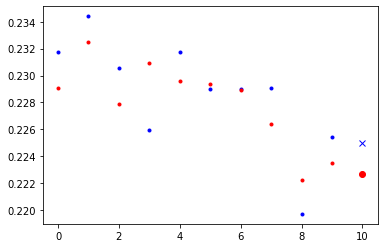

In [28]:
print("train_x[0]\n", train_x[0])
print()
print("train_y[0]\n", train_y[0])

plt.plot(train_x[0].T[0], '.', color='blue')
plt.plot([len(train_x[0])], train_y[0,0], 'x', color='blue')
plt.plot(train_x[0].T[1], '.', color='red')
plt.plot([len(train_x[0])], train_y[0,1], 'o', color='red')

plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               68608     
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 5)                 645       
                                                                 
Total params: 69,253
Trainable params: 69,253
Non-trainable params: 0
_________________________________________________________________


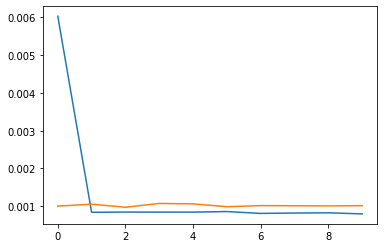

17/17 [==============================] - 0s 4ms/step - loss: 0.0016 - mape: 30603.6504
loss= 0.0016301301075145602
mape= 30603.650390625


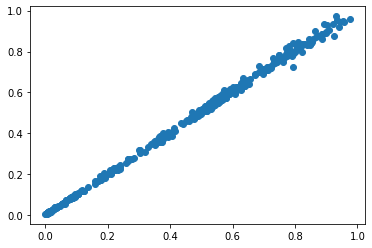

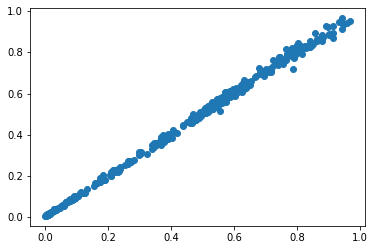

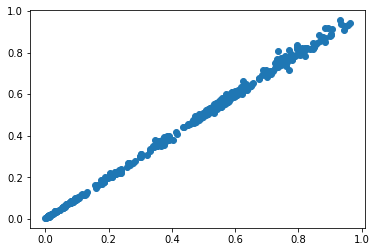

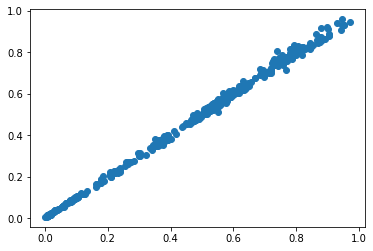

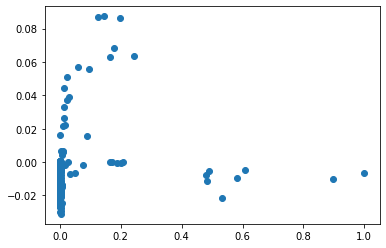

In [29]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
output_shape = train_y.shape[-1]

model = keras.Sequential()
model.add(LSTM(128, input_shape=input_shape))
model.add(Flatten())
model.add(Dense(output_shape))
model.compile(loss="mse", optimizer="adam", metrics=["mape"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=BATCH_SIZE)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)



y_ = model.predict(test_x).squeeze()
for i in range(output_shape):
    plt.scatter(test_y[:,i], y_[:,i])
    plt.show()

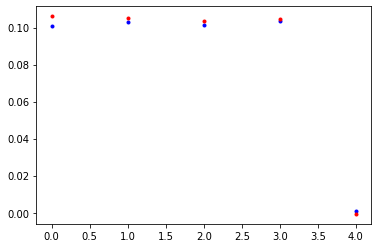

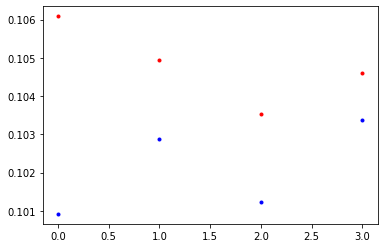

In [30]:
plt.plot(test_y[0], 'b.')
plt.plot(y_[0], 'r.')
plt.show()

plt.plot(test_y[0,:-1], 'b.')
plt.plot(y_[0,:-1], 'r.')
plt.show()

In [31]:
denomalized_test_y = test_y * (maxs - mins) + mins
denomalized_y_ = y_ * (maxs - mins) + mins

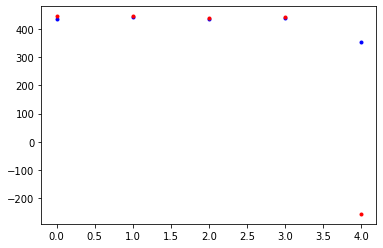

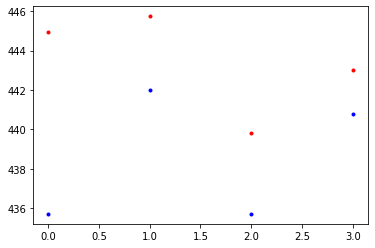

In [32]:
plt.plot(denomalized_test_y[0], 'b.')
plt.plot(denomalized_y_[0], 'r.')
plt.show()

plt.plot(denomalized_test_y[0,:-1], 'b.')
plt.plot(denomalized_y_[0,:-1], 'r.')
plt.show()

# by Keras Sequence Data Generator

In [33]:
from tensorflow.keras.utils import Sequence

class DataGenerator(Sequence):

    def __init__(self, numbers, 
                 sequence_length=SEQUENCE_LENGTH, 
                 offset=OFFSET, 
                 batch_size=BATCH_SIZE, 
                 shuffle=True,
                 validation_split=0.0,
                 test_split=0.0,
                 indexes=None,
                 max_size=None):
        self.numbers = numbers
        self.sequence_length = sequence_length
        self.offset = offset
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indexes, self.valid_indexes, self.test_indexes = self._prepare_indexes(validation_split, test_split, indexes, max_size)

    def __len__(self):
        return int(np.floor(len(self.indexes) / self.batch_size))

    def __getitem__(self, index):
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        return self._generate_data(indexes)

    def on_epoch_end(self):
        self._shuffle_index()

    def _prepare_indexes(self, validation_split, test_split, indexes, max_size):
        if indexes is not None:
            return indexes, None, None

        data_count = len(self.numbers) - (self.sequence_length+self.offset) + 1
        all_index = np.arange(data_count)
        np.random.shuffle(all_index)
        if max_size is not None:
            all_index = all_index[:max_size]

        if validation_split+test_split==0.0:
            return all_index, None, None

        valid_i = int(len(all_index)*(1-validation_split-test_split))
        test_i = int(len(all_index)*(1-test_split))

        return all_index[:valid_i], all_index[valid_i:test_i], all_index[test_i:]
        
    def _shuffle_index(self):
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def _generate_data(self, indexes):
        X = np.empty((len(indexes), self.sequence_length, self.numbers.shape[-1]))
        Y = np.empty((len(indexes), self.numbers.shape[-1]))

        for i, index in enumerate(indexes):
            X[i] = self.numbers[index:index+self.sequence_length]
            Y[i] = self.numbers[index+self.sequence_length+self.offset-1]
        return X, Y

    def get_all_data(self):
        return self._generate_data(self.indexes)        

    def subset(self, type):
        if type=="train":
            return DataGenerator(self.numbers, indexes=self.indexes)
        elif type=="validation" or type=="valid":
            return DataGenerator(self.numbers, indexes=self.valid_indexes)
        elif type=="test":
            return DataGenerator(self.numbers, indexes=self.test_indexes)
        else:
            print("invalid type {}".format(type))

In [34]:
data_generator = DataGenerator(preprocessed, validation_split=0.1, test_split=0.1)
train_data_generator = data_generator.subset("train")
valid_data_generator = data_generator.subset("valid")
test_data_generator = data_generator.subset("test")

batch_x, batch_y = train_data_generator.__getitem__(0)
print(batch_x.shape)
print(batch_y.shape)
print(batch_x[0])
print(batch_y[0])

print(len(preprocessed)-(SEQUENCE_LENGTH+OFFSET)+1)
print(len(train_data_generator.indexes))
print(len(valid_data_generator.indexes))
print(len(test_data_generator.indexes))

(32, 10, 5)
(32, 5)
[[2.52387615e-01 2.49764801e-01 2.53165280e-01 2.52950343e-01
  4.91802430e-05]
 [2.58140191e-01 2.55188448e-01 2.57647072e-01 2.53005996e-01
  8.54183168e-05]
 [2.59201327e-01 2.56239953e-01 2.59999987e-01 2.56457350e-01
  9.31836183e-05]
 [2.57358273e-01 2.54413627e-01 2.58151254e-01 2.56457350e-01
  2.69197120e-04]
 [2.62273095e-01 2.59283841e-01 2.63081219e-01 2.59908704e-01
  3.10612061e-05]
 [2.66629447e-01 2.63600653e-01 2.67450994e-01 2.65698074e-01
  3.10612061e-05]
 [2.66070943e-01 2.63047219e-01 2.66890770e-01 2.65141405e-01
  1.55306031e-05]
 [2.66461869e-01 2.63434596e-01 2.67282900e-01 2.65531046e-01
  3.88265076e-04]
 [2.66182617e-01 2.63157879e-01 2.67002788e-01 2.65252712e-01
  1.55306031e-04]
 [2.64339563e-01 2.61331553e-01 2.65154055e-01 2.63415711e-01
  3.33933850e-02]]
[0.26428373 0.26531629 0.26464987 0.26586507 0.03064965]
5169
4135
517
517


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               68608     
                                                                 
 flatten_1 (Flatten)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
Total params: 69,953
Trainable params: 69,953
Non-trainable params: 0
_________________________________________________________________


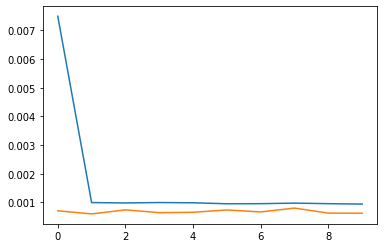

16/16 [==============================] - 0s 4ms/step - loss: 8.8556e-04 - mape: 67377.5469
loss= 0.0008855621563270688
mape= 67377.546875


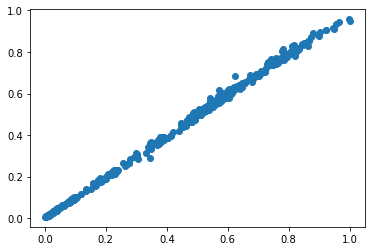

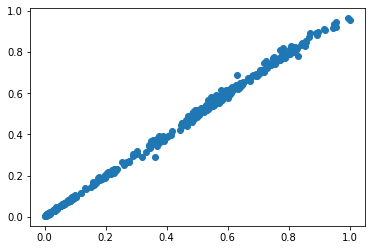

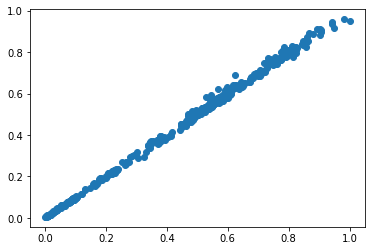

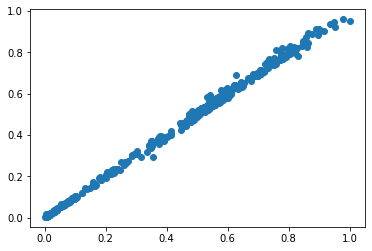

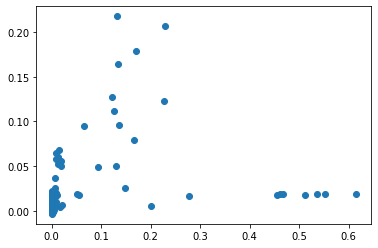

In [35]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU, Input

input_shape = (SEQUENCE_LENGTH, preprocessed.shape[-1])
output_shape = preprocessed.shape[-1]

model = keras.Sequential()
model.add(Input(input_shape))
model.add(LSTM(128))
model.add(Flatten())
model.add(Dense(10, activation="relu"))
model.add(Dense(output_shape))
model.compile(loss="mse", optimizer="adam", metrics=["mape"])
model.summary()

history = model.fit(train_data_generator, epochs=10, verbose=0, validation_data=valid_data_generator)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mape = model.evaluate(test_data_generator)
print("loss=", loss)
print("mape=", mape)


batch_x, batch_y = test_data_generator.get_all_data()
y_ = model.predict(batch_x).squeeze()
for i in range(output_shape):
    plt.scatter(batch_y[:,i], y_[:,i])
    plt.show()